# GIS in Python: Intro to Coordinate Reference Systems in Python

## What is a Coordinate Reference System

To define the location of something you often use a coordinate system. This system consists of an X and a Y value located within a 2 (or more) -dim space.

![Coordinate System](CS.png)

While the above coordinate system is a 2D, you live on a 3D earth that happens to be "elliptical". To define the location of objects on the Earth, which is round, you need a coordinate system that adapts to the Earth's shape. When you make maps on paper or on a flat computer screen, you move from a 3D (globe) to a 2D space. The components of the CRS define how the "flattening" of data that exists in a 3D globe space. The CRS also defines the coordinate system itself.

![Coordinate Reference System](CRS.png)

A CRS is a coordinate-based local, regional, or global system used to locate geographical entities. -Wikipedia

## The components of a CRS

The coordinate reference system is made up of several key components:
- Coordinate System: the X, Y grid upon which your data is overlayed and how you define where a point is located in space.
- Horizontal and vertical units: the units used to define the grid along the x, y, (and z) axis.
- Datum: a modelled version of the shape of the Earth which defines the origin used to place the coordinate system in space.
- Projection Information_ the math equation used to flatten objects that are on a round surface (e.g. Earth) so you can view them on a flat surface (e.g. computer screens or a paper map).

## Why CRS is important

It is important to understand the coordinate system that your data uses - particularly if you are working with different data stored in different coordinate systems. If you have data from the same location that are stored in different coordinate reference systems, they will not line up in any GIS or other program unless you have ArcGIS or QGIS that supports projection on the fly. Even if you work in a tool that supports projection on the fly, you will want all of your data in the same projection for performing analysis and processing tasks.

### Coordinate System & Units

You can define a spatial location, such as a plot location, using an x- and a y- value - similar to your cartesian coordinate system displayed in the figure, above.

For example, the map below shows all of the continents in the world, in a Geographic CRS. The units are Degrees and the coordinate system itself is Lat and Long with the origin being the location where the equator meets the central meridian on the globe (0, 0).

You will learn more about CRS by exploring some data.

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

In [5]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global",
                              "ne_110m_land", "ne_110m_land.shp")

worldBound = gpd.read_file(worldBound_path)

### Plot the data

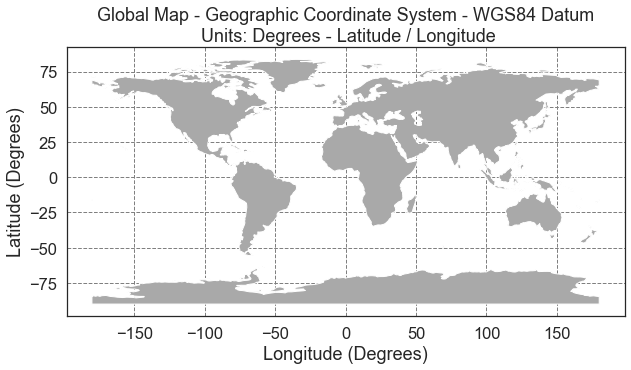

In [6]:
# Plot worldBound data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color="darkgrey",
               ax=ax)

# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
      ylabel="Latitude (Degrees)",
      title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray",
             linestyle="dashed")
ax.xaxis.grid(color="gray",
             linestyle="dashed")

### Create spatial points object

Next, add these 3 coordinate locations to your map. Note that the UNITS are in decimal degrees (lat, long:
- Boulder, Colorado: 40.0274, -105.2519
- Oslo, Norway: 59.9500, 10.7500
- Mallorca, Spain: 39.6167, 2.98323

To plot these points spatially you will
1. create a numpy array of the point locations and
2. Use a for loop to populate a shapely Point object

In [8]:
# Create numpy array of x, y point locations
add_points = np.array([[-105.2519, 40.0274],
                      [10.75, 59.95],
                      [2.9833, 39.6167]])

# Turn points into list of x, y shapely points
city_locations = [Point(xy) for xy in add_points]
city_locations

In [9]:
# Create geodataframe using the points
city_locations = gpd.GeoDataFrame(city_locations,
                                 columns=["geometry"],
                                 crs=worldBound.crs)

city_locations.head(3)

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)


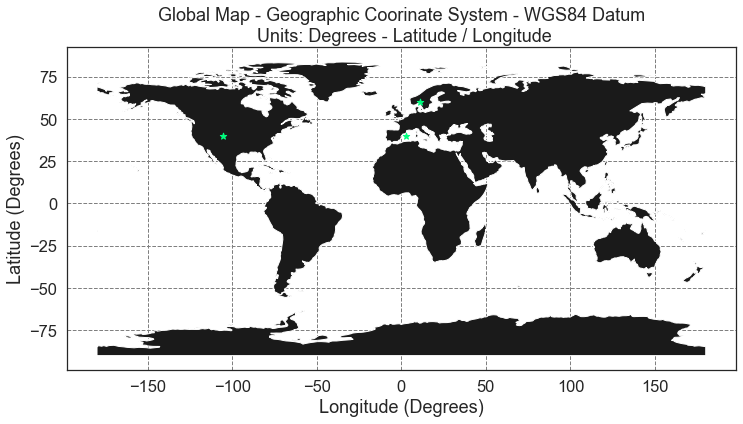

In [11]:
# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color="k",
               ax=ax)

# Add city locations
city_locations.plot(ax=ax,
                   color="springgreen",
                   marker="*",
                   markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
      title="Global Map - Geographic Coorinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.xaxis.grid(color="gray", linestyle="dashed")

Next, import proper graticules that can be projected into a particular CRS.

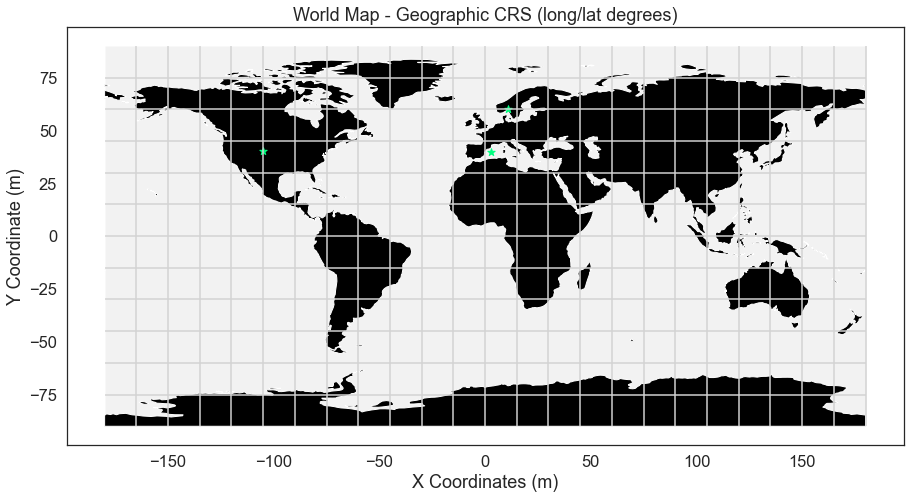

In [12]:
# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("data", "spatial-vector-lidar", "global",
                             "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data", "spatial-vector-lidar", "global",
                        "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)

# Create map axis object
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Add bounding box and graticule layers
bbox.plot(ax=ax, alpha=.1, color="gray")
graticule.plot(ax=ax, color="lightgray")
worldBound.plot(ax=ax, color="black")

# Add points to plot
city_locations.plot(ax=ax,
                    markersize=60,
                    color="springgreen",
                    marker="*")

# Add title and axes labels
ax.set(title="World Map - Geographic CRS (long/lat degrees)",
      xlabel="X Coordinates (m)",
      ylabel="Y Coordinate (m)");

## Geographic CRS - The good & the less good

Geographhic coordinate system in decimal degrees are helpful when you need to locate places on the Earth. However, latitude and longitude locations are not located using uniform measurement units. Thus, geographic CRSs are not ideal for measuring distances. This is why other projected CRS have been deployed.

## Projected CRS - Robinson

You can view the same data above, in another CRS - Robinson. Robinson is a projected CRS. Notice that the country boundaries on the map - have a different shape compared to the map that you created above in the CRS: Geographic lat/long WGS84.

Below you 1st reproject your data into the robinson projects (+proj=robin). Then you plot the data once again.

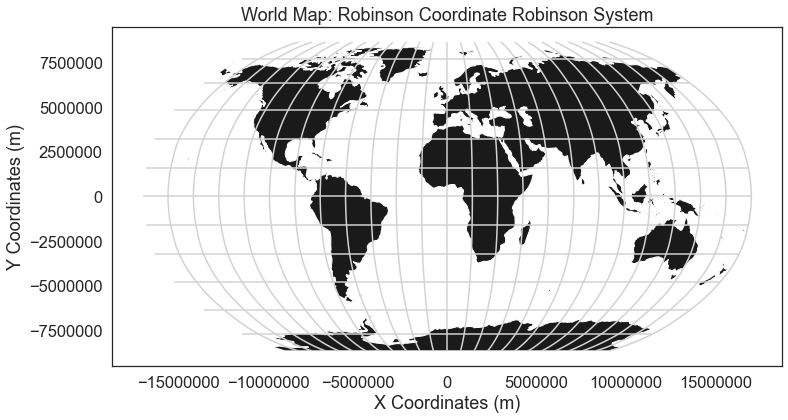

In [14]:
# Reproject the data
worldBound_robin = worldBound.to_crs("+proj=robin")
graticule_robin = graticule.to_crs("+proj=robin")

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color="k")

graticule_robin.plot(ax=ax, color="lightgray")

ax.set(title="World Map: Robinson Coordinate Robinson System",
      xlabel="X Coordinates (m)",
      ylabel="Y Coordinates (m)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

What happens if you add the same Lat/Long coordinate locations that you used above, to your map? Remember that the data on your map are in the CRS - Robinson.

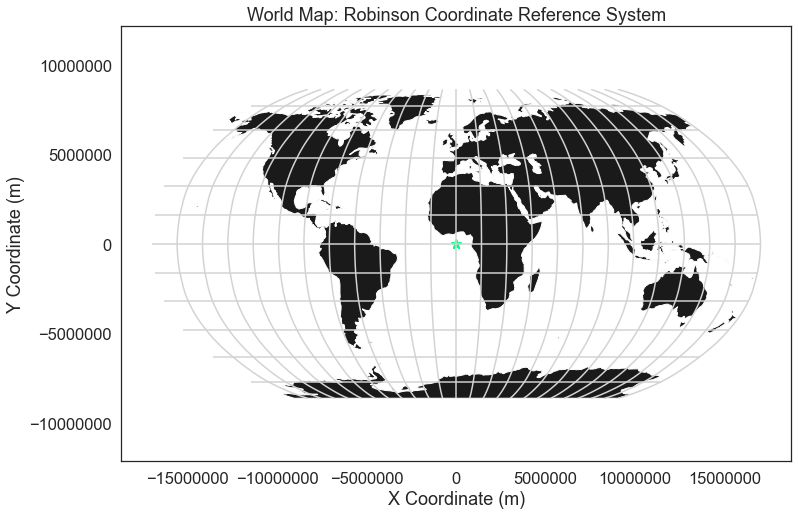

In [18]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color="k")

graticule_robin.plot(ax=ax,
                    color="lightgrey")

city_locations.plot(ax=ax,
                   marker="*",
                   color="springgreen",
                   markersize=100)

ax.set(title="World Map: Robinson Coordinate Reference System",
      xlabel="X Coordinate (m)",
      ylabel="Y Coordinate (m)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis("equal");

Notice above that when you try to add lat/long coordinates in degrees, to a map in a different CRS, the points are not in the correct location. You need to 1st convert the points to the same CRS that your other data are in. The process of converting a dataset from 1 CRS to another is called reprojection

Use the .to_Crs method to reproject your data

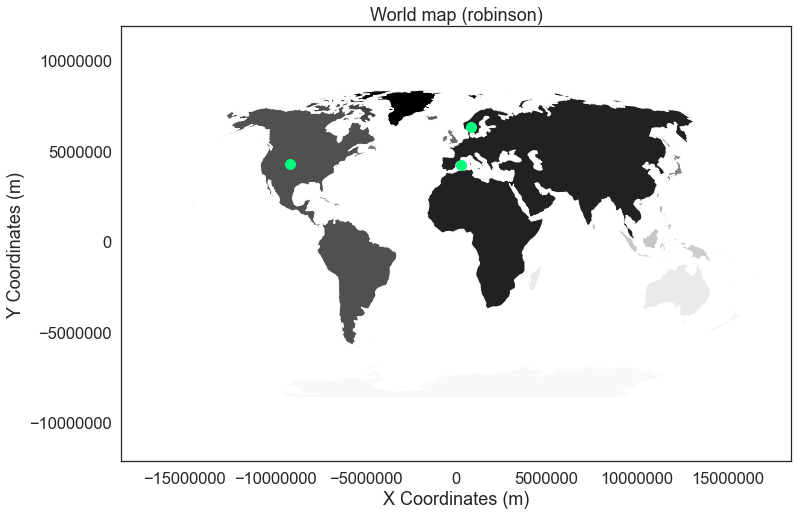

In [21]:
# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
worldBound_robin.plot(ax=ax,
                     cmap="Greys")
ax.set(title="World map (robinson)",
      xlabel="X Coordinates (m)",
      ylabel="Y Coordinates (m)")
city_locations_robin.plot(ax=ax, markersize=100, color="springgreen")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis("equal");

### Compare maps

Both of the plots above look visually different and also use a different coordinate system.

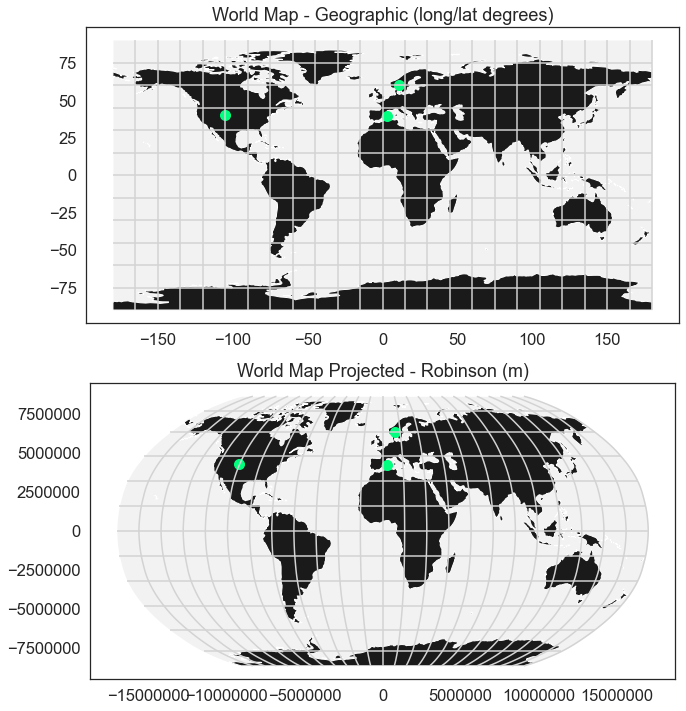

In [25]:
# Reproject graticules and bounding box to robinson
graticule_robinson = graticule.to_crs("+proj=robin")
bbox_robinson = bbox.to_crs("+proj=robin")

# Setup plot with 2 "rows" one for each map and one column
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

# First plot
bbox.plot(ax=ax0,
         alpha=.1,
         color="grey")

graticule.plot(ax=ax0,
               color="lightgrey")

worldBound.plot(ax=ax0,
               color="k")

city_locations.plot(ax=ax0,
                   markersize=100,
                   color="springgreen")

ax0.set(title="World Map - Geographic (long/lat degrees)")

# Second plot
bbox_robinson.plot(ax=ax1,
                  alpha=.1,
                  color="grey")

graticule_robinson.plot(ax=ax1,
                       color="lightgrey")

worldBound_robin.plot(ax=ax1,
                     color="k")

city_locations_robin.plot(ax=ax1,
                         markersize=100,
                         color="springgreen")

ax1.set(title="World Map Projected - Robinson (m)")

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

## Why multiple CRS?

Each CRS is optimised to best represent the:
- shape and/or
- scale/distance and/or
- area

of features in the data. And no one CRS is great at optimising all3 elements: shape, distance AND area. Some CRSs are optimised for shape, some are optimised for distance and some are optimised for area. Some CRSs are also optimised for particular regions 0 for instance the US, or EU. It's important to understand that the CRS that you choose for your data, will impact working with the data.

![Maps](projections.jpg)

### Geographic vs Projected CRS

The above maps provide examples of the 2 main types of coordinate systems:
1. Geographic coordinate systems: coordinate systems that span the entire globe (e.g. latitude/longitude).
2. Projected coordinate systems: coordinate systems that are localised to minimise visual distortion in a particular region (e.g. Robinson, UTM, State Plane)